## Credit Card Fraud Detection Classification using Neural Networks in Pytorch

**Task:** Implementing a Credit Card Fraud Detection classifier using a Neural network in PyTorch Framework

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

**Reading Dataset**

In [ ]:
df = pd.read_excel('/content/CreditCardDataset.xlsx')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


**Exploratory Data Analysis and Preprocessing**

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,...,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000
mean,94577.357074,-0.029092,0.030156,-0.055749,0.035521,-0.022664,-0.006869,-0.032448,0.006142,-0.017667,...,0.005569,-0.000265,0.003273,0.001159,0.005003,0.003133,0.000226,-0.000625,88.825575,0.008578
std,47505.713234,2.061391,1.711228,1.733364,1.484621,1.508300,1.361819,1.504317,1.334058,1.131679,...,0.813950,0.734597,0.625238,0.604653,0.519852,0.482496,0.433713,0.323980,279.496913,0.092221
min,2.000000,-36.802320,-63.344698,-48.325589,-5.519697,-113.743307,-19.996349,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-32.828995,-2.822384,-8.696627,-2.534330,-8.878665,-15.430084,0.000000,0.000000
25%,53943.500000,-0.927615,-0.588747,-0.922554,-0.839400,-0.692157,-0.774796,-0.558211,-0.207145,-0.651869,...,-0.226932,-0.541278,-0.161812,-0.354648,-0.312164,-0.322536,-0.070642,-0.052695,5.475000,0.000000
50%,84641.000000,0.015980,0.071801,0.168619,-0.005637,-0.055913,-0.276163,0.035797,0.024380,-0.053373,...,-0.028379,0.004681,-0.011439,0.041286,0.021494,-0.049135,0.000859,0.011169,21.990000,0.000000
75%,139140.000000,1.314129,0.815413,1.019384,0.764271,0.607021,0.387408,0.562758,0.333358,0.599522,...,0.190245,0.529286,0.147282,0.439244,0.352590,0.243882,0.091355,0.078500,76.900000,0.000000
max,172777.000000,2.454930,22.057729,3.940337,16.715537,28.762671,73.301626,120.589494,20.007208,10.348407,...,27.202839,10.503090,22.528412,4.584549,5.826159,3.517346,31.612198,15.866721,25691.160000,1.000000


In [ ]:
#checking for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.shape

(57355, 31)

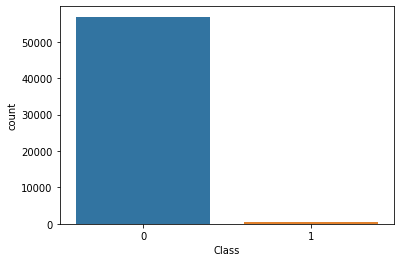

In [ ]:
#Checking distribution of Class
sns.countplot(x = 'Class', data=df)

There are no missing values in our dataset, so we have a clean dataset. I also notice that the Class column which is our target is highly imbalanced, I'll be addressing that with some steps below.

In [ ]:
#Creating Input and Output Data
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

**Splitting into Train - Validation - Test**

In [ ]:
# Split into train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=21)

In [ ]:
#Normalizing Input
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

**Visualizing Class Distribution in Train, Val, and Test**

In [ ]:
def get_class_distribution(obj):
    count_dict = {
        "0": 0,
        "1": 0,
    }
    
    for i in obj:
        if i == 0: 
            count_dict['0'] += 1
        elif i == 1: 
            count_dict['1'] += 1            
        else:
            print("Check classes.")
            
    return count_dict

Text(0.5, 1.0, 'Class Distribution in Test Set')

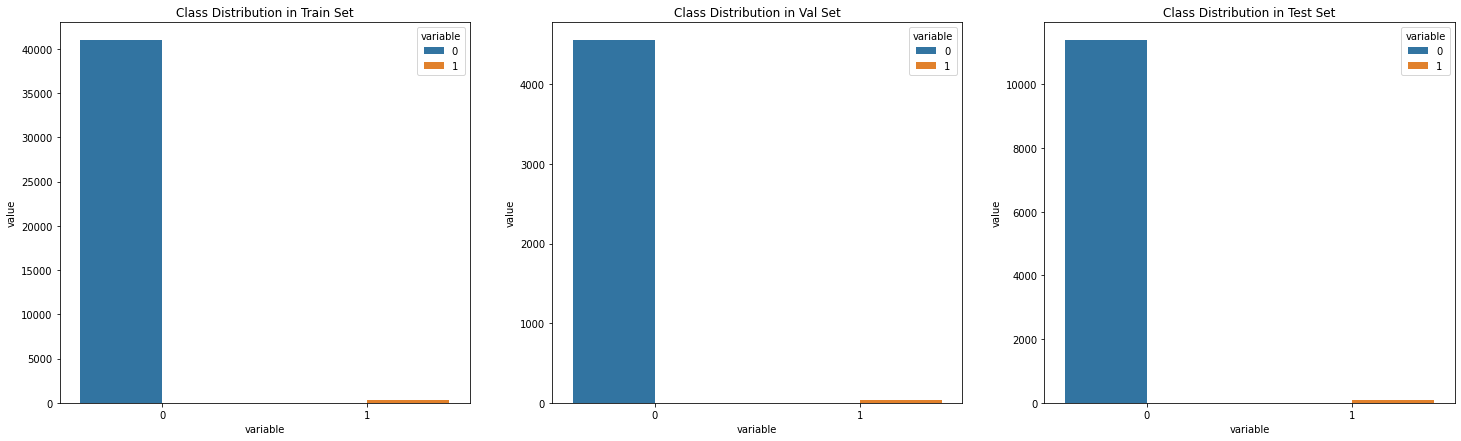

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))
# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')
# Validation
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_val)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Val Set')
# Test
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[2]).set_title('Class Distribution in Test Set')

### Implementing Neural Network with Pytorch Framework

In [ ]:
#Custom Dataset
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

**Weighted Sampling**

In [ ]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)
target_list = target_list[torch.randperm(len(target_list))]

In [ ]:
class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
print(class_weights)

tensor([2.4426e-05, 2.8169e-03])


In [ ]:
class_weights_all = class_weights[target_list]

In [ ]:
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

We're using the weighted_sampler to handle the imbalanced class.

In [ ]:
EPOCHS = 50
BATCH_SIZE = 128
LEARNING_RATE = 0.0007
NUM_FEATURES = len(X.columns)
NUM_CLASSES = 2

In [ ]:
#Dataloader
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          sampler=weighted_sampler
)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

**Defining Neural Net Architecture for Pytorch**

In [ ]:
class BinaryClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(BinaryClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 16)
        self.layer_2 = nn.Linear(16, 8)
        self.layer_out = nn.Linear(8, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        #self.batchnorm1 = nn.BatchNorm1d(32)
        #self.batchnorm2 = nn.BatchNorm1d(16)
      
        
    def forward(self, x):
        x = self.layer_1(x)
        #x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        #x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
model = BinaryClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
#gpu code
model.to(device)

#criterion = nn.CrossEntropyLoss(weight=class_weights)

#gpu code
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))

optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

BinaryClassification(
  (layer_1): Linear(in_features=30, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=8, bias=True)
  (layer_out): Linear(in_features=8, out_features=2, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)


In [ ]:
def binary_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

**Train the Model**

In [ ]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        # get the inputs
        #X_train_batch, y_train_batch = X_train_batch, y_train_batch
        
        #gpu code
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        y_train_pred = model(X_train_batch)
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = binary_acc(y_train_pred, y_train_batch)
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            # get the inputs
            #X_val_batch, y_val_batch = X_val_batch, y_val_batch
            
            #gpu code
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = binary_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    # print statistics
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')

Begin training.


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.59221 | Val Loss: 0.34549 | Train Acc: 90.215| Val Acc: 99.150
Epoch 002: | Train Loss: 0.50762 | Val Loss: 0.34084 | Train Acc: 98.751| Val Acc: 99.564
Epoch 003: | Train Loss: 0.34061 | Val Loss: 0.14494 | Train Acc: 99.077| Val Acc: 99.673
Epoch 004: | Train Loss: 0.21909 | Val Loss: 0.13140 | Train Acc: 98.994| Val Acc: 99.281
Epoch 005: | Train Loss: 0.16044 | Val Loss: 0.13359 | Train Acc: 99.077| Val Acc: 98.366
Epoch 006: | Train Loss: 0.13698 | Val Loss: 0.07142 | Train Acc: 98.794| Val Acc: 98.976
Epoch 007: | Train Loss: 0.12239 | Val Loss: 0.02985 | Train Acc: 98.872| Val Acc: 99.564
Epoch 008: | Train Loss: 0.12799 | Val Loss: 0.08944 | Train Acc: 98.741| Val Acc: 98.213
Epoch 009: | Train Loss: 0.12843 | Val Loss: 0.09146 | Train Acc: 98.573| Val Acc: 98.126
Epoch 010: | Train Loss: 0.11818 | Val Loss: 0.05457 | Train Acc: 98.650| Val Acc: 98.910
Epoch 011: | Train Loss: 0.11364 | Val Loss: 0.06736 | Train Acc: 98.720| Val Acc: 98.540
Epoch 012:

*Visualizing Loss and Accuracy**

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

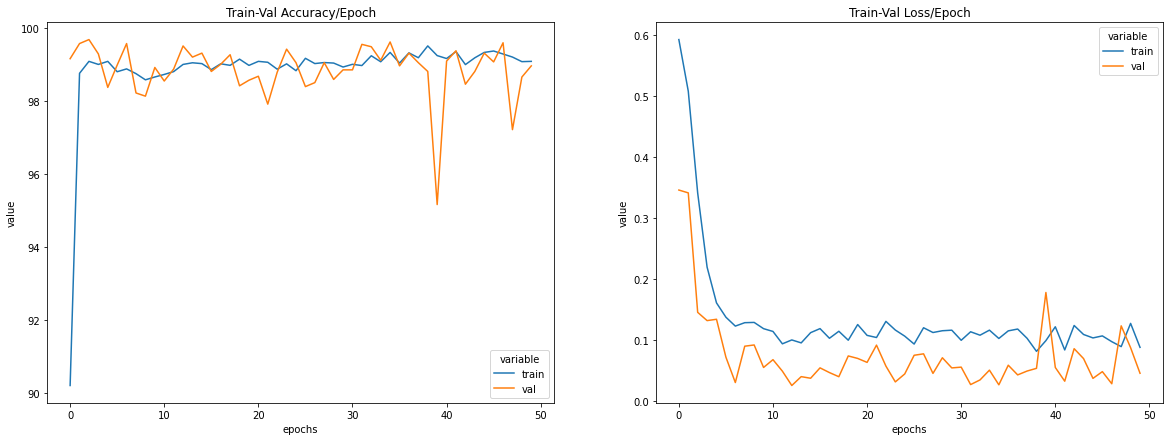

In [ ]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [ ]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        #gpu code
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        #y_pred_list.append(y_pred_tags.numpy())
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [ ]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     11373
           1       0.54      0.91      0.68        98

    accuracy                           0.99     11471
   macro avg       0.77      0.95      0.84     11471
weighted avg       1.00      0.99      0.99     11471



**Conclusion**

We can observe from the plot of the Training and Validation Accuracy above that our model is performing well, and it got a good final accuracy percentage on both Training and Validation, with both getting 99.07% and 98.95% respectively. In the Training and Validation Loss Plot, we can also observe that the validation loss is decreasing than the training loss. This shows that our model is performing well.

The classification report also shows the model is performing well in predicting the test data, It performed really well in predicting the 0 Class, while we do not have a very good precision and f1-score for the 1 class. This is expected because we had an imbalanced data, and its not doing so bad in the prediction since we handled the imbalance in the dataset.